#### Datasource: https://stooq.com/db/h/

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime

In [22]:
dateparse = lambda x: datetime.strptime(x, '%Y%m%d')
apple = pd.read_csv(r'./data/daily/us/nasdaq stocks/1/aapl.us.txt',index_col='<DATE>',parse_dates=['<DATE>'], date_parser=dateparse)
apple.columns = ['Ticker', 'PER', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
apple.head()

,Ticker,PER,Time,Open,High,Low,Close,Volume,OpenInt
<DATE>,,,,,,,,,
1984-09-07,AAPL.US,D,0,0.10182,0.10306,0.10060,0.10182,96661645,0
1984-09-10,AAPL.US,D,0,0.10182,0.10213,0.09937,0.10122,75025205,0
1984-09-11,AAPL.US,D,0,0.10213,0.10490,0.10213,0.10306,176913886,0
1984-09-12,AAPL.US,D,0,0.10306,0.10367,0.09998,0.09998,154549368,0
1984-09-13,AAPL.US,D,0,0.10552,0.10582,0.10552,0.10552,240704925,0


In [23]:
apple['EMA12'] = apple['Close'].ewm(span=12).mean()
apple['EMA26'] = apple['Close'].ewm(span=26).mean()
apple['MACD'] = apple['EMA26'] - apple['EMA12']

In [24]:
apple['MACDSignalLine'] = apple['MACD'].ewm(span=9).mean()
apple['Histogram'] = apple['MACD'] - apple['MACDSignalLine']

In [25]:
apds = [mpf.make_addplot(apple['EMA12'][-100:], color='yellow'),
        mpf.make_addplot(apple['EMA26'][-100:], color='c'),
        mpf.make_addplot(apple['MACD'][-100:], panel=1, secondary_y=True, color='orange'),
        mpf.make_addplot(apple['MACDSignalLine'][-100:], panel=1, secondary_y=True, color='blue'),
        mpf.make_addplot(apple['Histogram'][-100:], panel=1, type='bar', color='purple', secondary_y=False)]


Text(0.5, 1.0, 'Apple Chart')

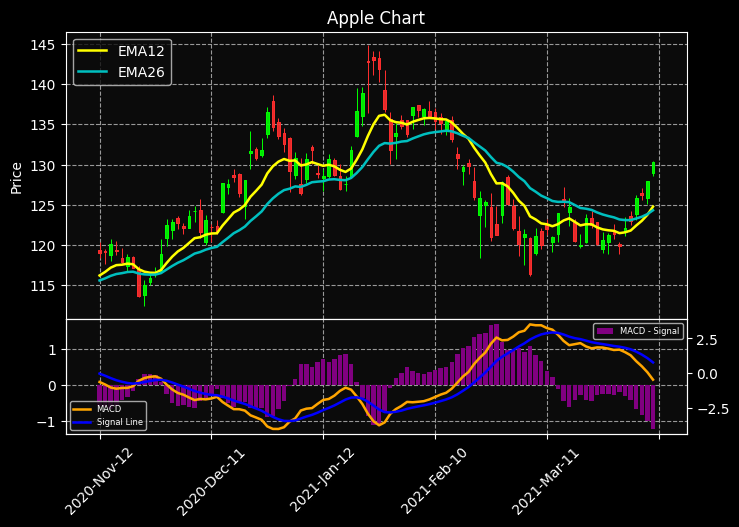

In [27]:
mc = mpf.make_marketcolors(up='#00ff00',down='#ff2e2e',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

fig, axes = mpf.plot(apple[-100:], 
                     volume_panel = 2,
                     figratio=(1.5,1),
                     figscale=1, 
                     type='candle', 
                     style=s,
                     addplot=apds,
                     returnfig=True)

labels = ['EMA12', 'EMA26']

axes[0].legend(labels, loc='upper left')
axes[2].legend(['MACD - Signal'], fontsize=6, loc='upper right')
axes[3].legend(['MACD', 'Signal Line'], fontsize=6, loc='lower left')

axes[0].set_title('Apple Chart')

In [29]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) 
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) 
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

In [30]:
apple['RSI'] = RSI(apple['Close'], 14)

In [32]:
apple.tail(10)

,Ticker,PER,Time,Open,High,Low,Close,Volume,OpenInt,EMA12,EMA26,MACD,MACDSignalLine,Histogram,RSI
<DATE>,,,,,,,,,,,,,,,
2021-03-25,AAPL.US,D,0,119.54,121.6600,119.0000,120.59,98844681,0,121.949305,123.795783,1.846479,2.096469,-0.249990,43.738551
2021-03-26,AAPL.US,D,0,120.35,121.4800,118.9200,121.21,94071234,0,121.835565,123.604244,1.768678,2.030911,-0.262232,45.020487
2021-03-29,AAPL.US,D,0,121.65,122.5800,120.7299,121.39,80819203,0,121.767017,123.440226,1.673209,1.959370,-0.286162,45.409388
2021-03-30,AAPL.US,D,0,120.11,120.4031,118.8600,119.90,85671919,0,121.479784,123.177987,1.698203,1.907137,-0.208934,42.715836
2021-03-31,AAPL.US,D,0,121.65,123.5200,121.1500,122.15,118323826,0,121.582894,123.101840,1.518946,1.829499,-0.310553,47.755496
2021-04-01,AAPL.US,D,0,123.66,124.1800,122.4900,123.00,75089134,0,121.800910,123.094296,1.293386,1.722276,-0.428890,49.560822
2021-04-05,AAPL.US,D,0,123.87,126.1601,123.0700,125.90,88651175,0,122.431539,123.302126,0.870587,1.551938,-0.681352,55.243291
2021-04-06,AAPL.US,D,0,126.50,127.1300,125.6500,126.21,80171253,0,123.012841,123.517524,0.504683,1.342487,-0.837804,55.816323
2021-04-07,AAPL.US,D,0,125.83,127.9200,125.1400,127.90,83466716,0,123.764712,123.842152,0.077440,1.089478,-1.012038,58.905313


In [40]:
apds2 = [mpf.make_addplot(apple['EMA12'][-100:], color='yellow'),
        mpf.make_addplot(apple['EMA26'][-100:], color='c'),
        mpf.make_addplot(apple['RSI'][-100:], panel=2, secondary_y=True, color='green'),
        mpf.make_addplot(apple['MACD'][-100:], panel=1, secondary_y=True, color='orange'),
        mpf.make_addplot(apple['MACDSignalLine'][-100:], panel=1, secondary_y=True, color='blue'),
        mpf.make_addplot(apple['Histogram'][-100:], panel=1, type='bar', color='purple', secondary_y=False)]


TypeError: __init__() got an unexpected keyword argument 'color'

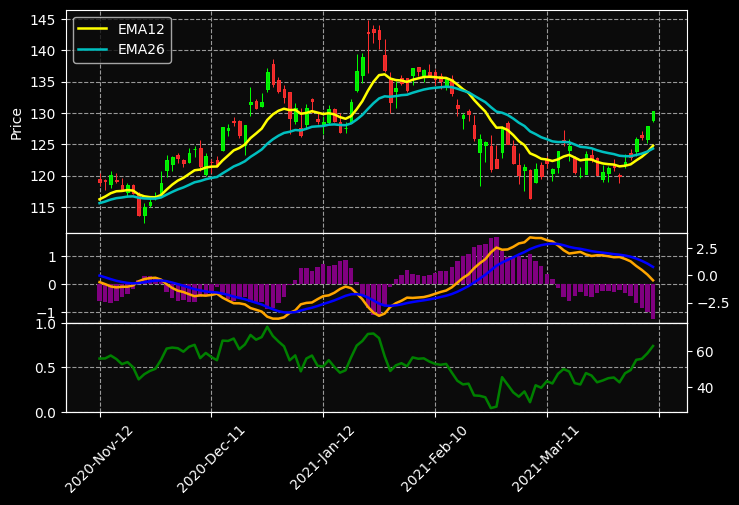

In [46]:
mc = mpf.make_marketcolors(up='#00ff00',down='#ff2e2e',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)

fig, axes = mpf.plot(apple[-100:], 
                     volume_panel = 3,
                     figratio=(1.5,1),
                     figscale=1, 
                     type='candle', 
                     style=s,
                     addplot=apds2,
                     returnfig=True)

labels = ['EMA12', 'EMA26']

axes[0].legend(labels, loc='upper left')
axes[3].legend(['RSI'], fontsize=6, loc='lower right')
axes[2].legend(['MACD'], fontsize=6, loc='upper right')

axes[0].set_title('Apple Chart')